In [11]:
from constants import train_trials
from functions import load_data, run_trial
import matplotlib.pyplot as plt

In [12]:
dfs = load_data(tcks=("AAPL", "DELL", "FORD", "IBM", "MACYS", "SP500"))

In [ ]:
# Replicate trials from the paper
mapes = {}
dpas = {}
preds = {}

# Paper constants (adjust as needed)
latency = 10
n_states = 4

for tck, trials in train_trials.items():
    mapes[tck] = {}
    dpas[tck] = {}
    for i, trial in trials.items():
        # TODO: Write predictions to CSV file
        results, _ = run_trial(
            dfs,
            tck=tck, train_period=trial["train"], test_period=trial["test"],
            latency=latency, n_states=n_states
        )
        mapes[tck][i] = results["MAPE"]
        dpas[tck][i] = results["DPA"]

In [45]:
# Experiment 1 - Robustness check on number of latent states

tck = "AAPL" # Ticker label (or the prefix of the CSV)
train_period = ("2003-02-10", "2004-09-10") # Training Period
test_period = ("2004-09-13", "2005-01-21") # Testing Period
latency = 10
n_states = [3, 4, 5, 6, 8]

mapes = {}
dpas = {}

for n in n_states:
    results, _ = run_trial(
        dfs, tck, train_period, test_period, latency=latency, n_states=n
    )
    mapes[n] = results["MAPE"]
    dpas[n] = results["DPA"]

Training HMM on train period ('2003-02-10', '2004-09-10')
Training Complete
Generating Predictions for test period ('2004-09-13', '2005-01-21')


100%|██████████| 92/92 [01:02<00:00,  1.48it/s]


Predictions Generated
AAPL trial with latent states = 3, context window size = 10
MAPE = 0.018032310975446626, DPA = 0.5217391304347826
--------------------------------------------------------------------------------
Training HMM on train period ('2003-02-10', '2004-09-10')
Training Complete
Generating Predictions for test period ('2004-09-13', '2005-01-21')


100%|██████████| 92/92 [01:10<00:00,  1.30it/s]


Predictions Generated
AAPL trial with latent states = 4, context window size = 10
MAPE = 0.01556451275223328, DPA = 0.5652173913043478
--------------------------------------------------------------------------------
Training HMM on train period ('2003-02-10', '2004-09-10')
Training Complete
Generating Predictions for test period ('2004-09-13', '2005-01-21')


100%|██████████| 92/92 [01:20<00:00,  1.15it/s]


Predictions Generated
AAPL trial with latent states = 5, context window size = 10
MAPE = 0.01556451275223328, DPA = 0.5652173913043478
--------------------------------------------------------------------------------
Training HMM on train period ('2003-02-10', '2004-09-10')
Training Complete
Generating Predictions for test period ('2004-09-13', '2005-01-21')


100%|██████████| 92/92 [01:28<00:00,  1.03it/s]


Predictions Generated
AAPL trial with latent states = 6, context window size = 10
MAPE = 0.01593297936221935, DPA = 0.4673913043478261
--------------------------------------------------------------------------------
Training HMM on train period ('2003-02-10', '2004-09-10')
Training Complete
Generating Predictions for test period ('2004-09-13', '2005-01-21')


100%|██████████| 92/92 [01:48<00:00,  1.18s/it]

Predictions Generated
AAPL trial with latent states = 8, context window size = 10
MAPE = 0.015605567468307492, DPA = 0.5434782608695652
--------------------------------------------------------------------------------


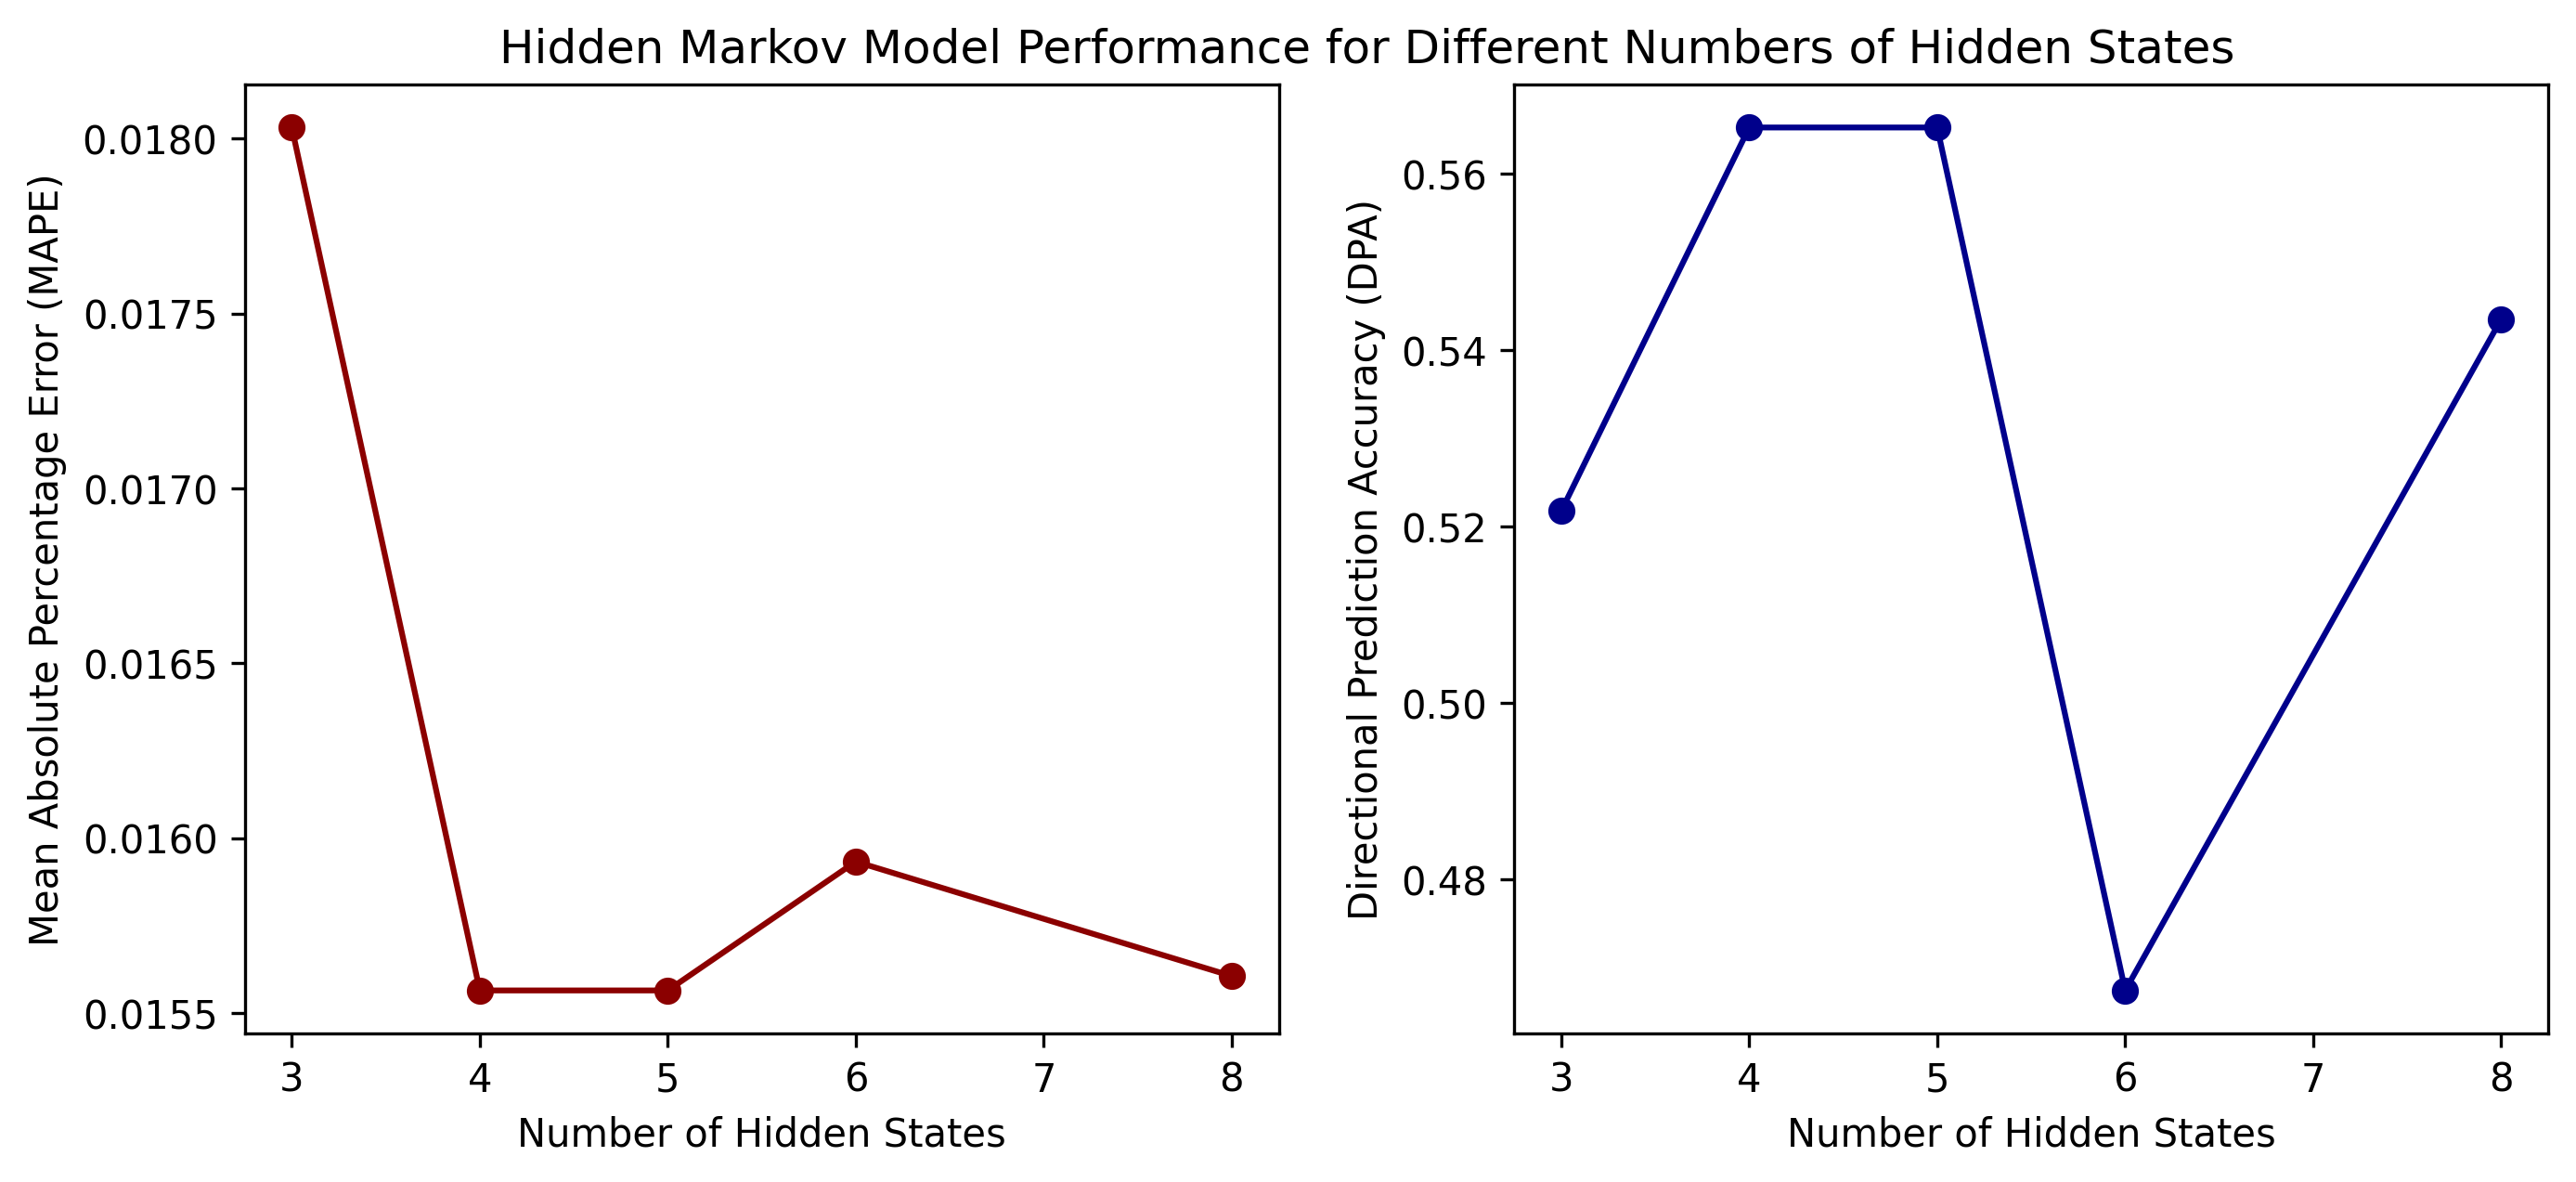

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), dpi=300)
fig.tight_layout(w_pad=3)
axs[0].plot(mapes.keys(), mapes.values(), color="darkred")
axs[0].scatter(mapes.keys(), mapes.values(), color="darkred")
axs[0].set_xlabel("Number of Hidden States")
axs[0].set_ylabel("Mean Absolute Percentage Error (MAPE)")
axs[1].plot(dpas.keys(), dpas.values(), color="darkblue")
axs[1].scatter(dpas.keys(), dpas.values(), color="darkblue")
axs[1].set_xlabel("Number of Hidden States")
axs[1].set_ylabel("Directional Prediction Accuracy (DPA)")
fig.suptitle(
    "Hidden Markov Model Performance for Different Numbers of Hidden States",
    y=1
)
plt.savefig("../images/states-testing.png", bbox_inches="tight")
plt.show()

In [17]:
# Experiment 2 - Robustness check on context window size

tck = "AAPL" # Ticker label (or the prefix of the CSV)
train_period = ("2003-02-10", "2004-09-10") # Training Period
test_period = ("2004-09-13", "2005-01-21") # Testing Period
latency = [6, 10, 20, 50]
n_states = 4

mapes = {}
dpas = {}

for l in latency:
    results, _ = run_trial(
        dfs, tck, train_period, test_period, latency=l, n_states=n_states
    )
    mapes[l] = results["MAPE"]
    dpas[l] = results["DPA"]

Training HMM on train period ('2003-02-10', '2004-09-10')
Training Complete
Generating Predictions for test period ('2004-09-13', '2005-01-21')


100%|██████████| 92/92 [01:13<00:00,  1.26it/s]


Predictions Generated
AAPL trial with latent states = 4, context window size = 6
MAPE = 0.020915574223608714, DPA = 0.5
--------------------------------------------------------------------------------
Training HMM on train period ('2003-02-10', '2004-09-10')
Training Complete
Generating Predictions for test period ('2004-09-13', '2005-01-21')


100%|██████████| 92/92 [01:11<00:00,  1.29it/s]


Predictions Generated
AAPL trial with latent states = 4, context window size = 10
MAPE = 0.01556451275223328, DPA = 0.5652173913043478
--------------------------------------------------------------------------------
Training HMM on train period ('2003-02-10', '2004-09-10')
Training Complete
Generating Predictions for test period ('2004-09-13', '2005-01-21')


100%|██████████| 92/92 [01:10<00:00,  1.31it/s]


Predictions Generated
AAPL trial with latent states = 4, context window size = 20
MAPE = 0.01952577901070566, DPA = 0.5217391304347826
--------------------------------------------------------------------------------
Training HMM on train period ('2003-02-10', '2004-09-10')
Training Complete
Generating Predictions for test period ('2004-09-13', '2005-01-21')


100%|██████████| 92/92 [01:12<00:00,  1.27it/s]

Predictions Generated
AAPL trial with latent states = 4, context window size = 50
MAPE = 0.03445693011519408, DPA = 0.4673913043478261
--------------------------------------------------------------------------------


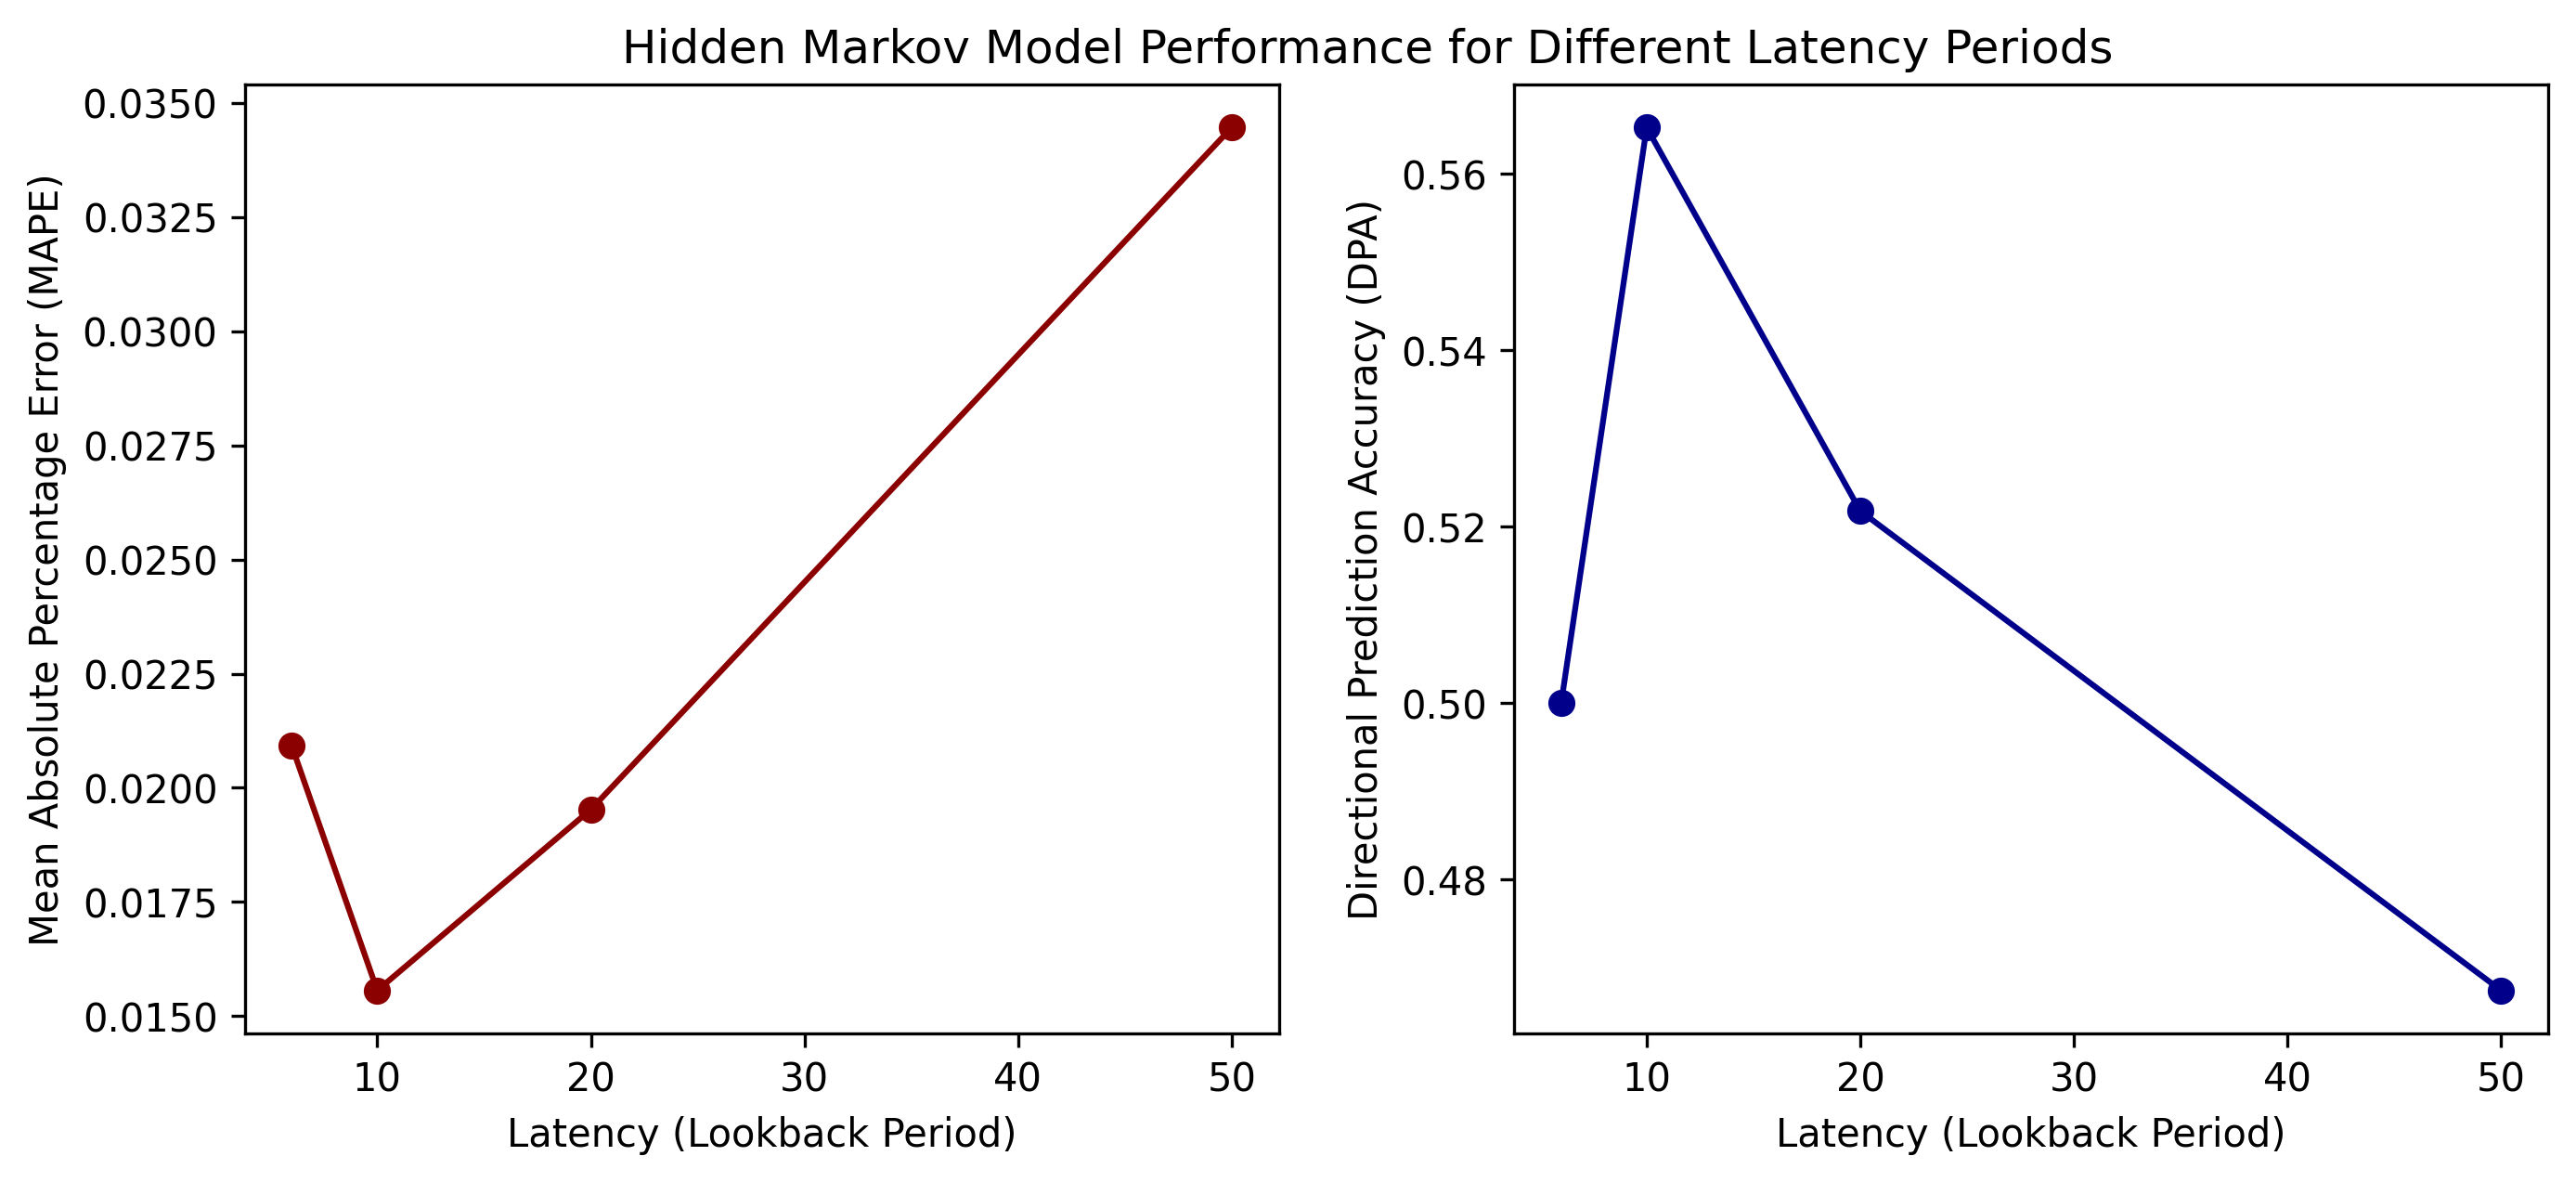

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), dpi=300)
fig.tight_layout(w_pad=3)
axs[0].plot(mapes.keys(), mapes.values(), color="darkred")
axs[0].scatter(mapes.keys(), mapes.values(), color="darkred")
axs[0].set_xlabel("Latency (Lookback Period)")
axs[0].set_ylabel("Mean Absolute Percentage Error (MAPE)")
axs[1].plot(dpas.keys(), dpas.values(), color="darkblue")
axs[1].scatter(dpas.keys(), dpas.values(), color="darkblue")
axs[1].set_xlabel("Latency (Lookback Period)")
axs[1].set_ylabel("Directional Prediction Accuracy (DPA)")
fig.suptitle(
    "Hidden Markov Model Performance for Different Latency Periods", y=1
)
plt.savefig("../images/latency-testing.png", bbox_inches="tight")
plt.show()

In [ ]:
# Experiment 3 - Generalizability test on different stocks at same time period

tcks = ["FORD", "MACYS", "SP500"] # Ticker label (or the prefix of the CSV)
train_period = ("2003-02-10", "2004-09-10") # Training Period
test_period = ("2004-09-13", "2005-01-21") # Testing Period
latency = 10
n_states = 4

for tck in tcks:
    run_trial(
        dfs, tck, train_period, test_period, latency=latency, n_states=n_states
)

In [ ]:
# Experiment 4 - Generalizability test of same stock at different time periods

tck = "AAPL" # Ticker label (or the prefix of the CSV)
train_periods = [("2005-02-10", "2005-09-09"), 
                 ("2011-02-10", "2011-09-12"),
                 ("2015-02-10", "2015-09-10")] 
test_periods = [("2005-09-12", "2006-01-20"), 
                ("2011-09-13", "2012-01-23"),
                ("2015-09-14", "2016-01-21")] 
latency = 10
n_states = 4

for i in range(len(train_periods)):
    train_period = train_periods[i]
    test_period = test_periods[i]
    run_trial(
        dfs, tck, train_period, test_period, latency=latency, n_states=n_states
)